# Car Price Prediction Data Visualizing and Data Modeling

#### Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#### Reading Dataset

In [10]:
cardf = pd.read_csv("C:/Users/PCS/Desktop/Ai Project/CarPrice_Assignment.csv")
cardf.head()

FileNotFoundError: File b'CarPrice_Assignment.csv' does not exist

### Data Cleansing
#### Checking Dublicates

In [ ]:
if sum(cardf.duplicated(subset = 'car_ID')) == 0:
    print("No Duplicates data is clean")
else:
    print("Duplicates")

#### Checking Null Values

In [ ]:
if any(cardf.isnull().sum()):
    print("Null values exist")
else:
    print("No Null values Data is clean")

### Univariate Analysis

In [ ]:
cardf['brand'] = cardf.CarName.str.split(' ').str.get(0).str.upper()
cardf['mileage'] = cardf['citympg']*0.55 + cardf['highwaympg']*0.45
df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
cardf = cardf.merge(df_comp_avg_price, on = 'brand')
cardf['brand_category'] = cardf['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 else ("Mid_Range" if 10000 <= x < 20000 else "Luxury"))



df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = True, sort_columns = True, figsize = (15,5))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

print("Above graph shows Avg Price of each company")


#### engine size VS price

In [ ]:
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = cardf)
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Bore ratio VS price

In [ ]:
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = cardf)
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Stroke vs price

In [ ]:
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = cardf)
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Compression Ratio

In [ ]:
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = cardf)
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
plt.show()

#### peakRpm vs price

In [ ]:
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = cardf)
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Wheelbase VS price

In [ ]:
plt9 = sns.scatterplot(x = 'wheelbase', y = 'price', data = cardf)
plt9.set_xlabel('Wheelbase (Inches)')
plt9.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Mileage VS price

In [ ]:
plt6 = sns.scatterplot(x = 'mileage', y = 'price', data = cardf)
plt6.set_xlabel('Mileage')
plt6.set_ylabel('Price of Car (Dollars)')
plt.show()    
print("Size of Engine, bore ratio,wheelbase has positive correlation with price")

#### Engine Type VS price

In [ ]:
df_engine_avg_price = cardf[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = True)
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Num of Cylinder VS price

In [ ]:
df_cylindernumber_avg_price = cardf[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = True)
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

#### Fuel system VS price

In [6]:
df_fuelsystem_avg_price = cardf[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = True)
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()  


print("DOHCV and OHCV engine types are priced high, Eight and twelve cylinder cars have higher price, IDI and MPFI fuel system have higher price.")  

NameError: name 'cardf' is not defined

#### aspiration VS price

In [7]:
df_aspir_avg_price = cardf[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()
print("It can be seen that turbo aspiration have more Avg price than std")

NameError: name 'cardf' is not defined

#### Fuel type VS price

In [8]:
df_fuel_avg_price = cardf[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

print("It can be seen that that diesel cars are more expensive than gas cars")

NameError: name 'cardf' is not defined

#### Car Body VS price

In [9]:
df_body_avg_price = cardf[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = True, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 


print("Hardtop and convertible are the most expensive so Price is depended on car body")

NameError: name 'cardf' is not defined

#### Drive wheel VS price

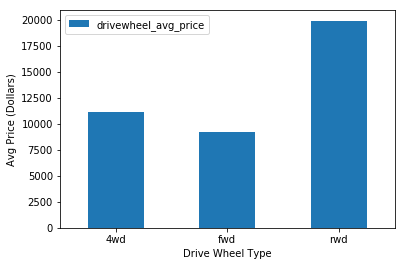

In [23]:
df_drivewheel_avg_price = cardf[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = True,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Horse power VS price

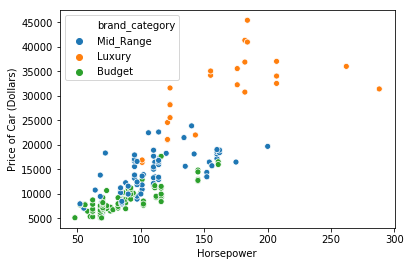

In [24]:
plt8 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = cardf)
plt8.set_xlabel('Horsepower')
plt8.set_ylabel('Price of Car (Dollars)')
plt.show()

### Car Dimensions VS price

#### length, height , width , Weight

Length width and weight of the car is positively related with the price.


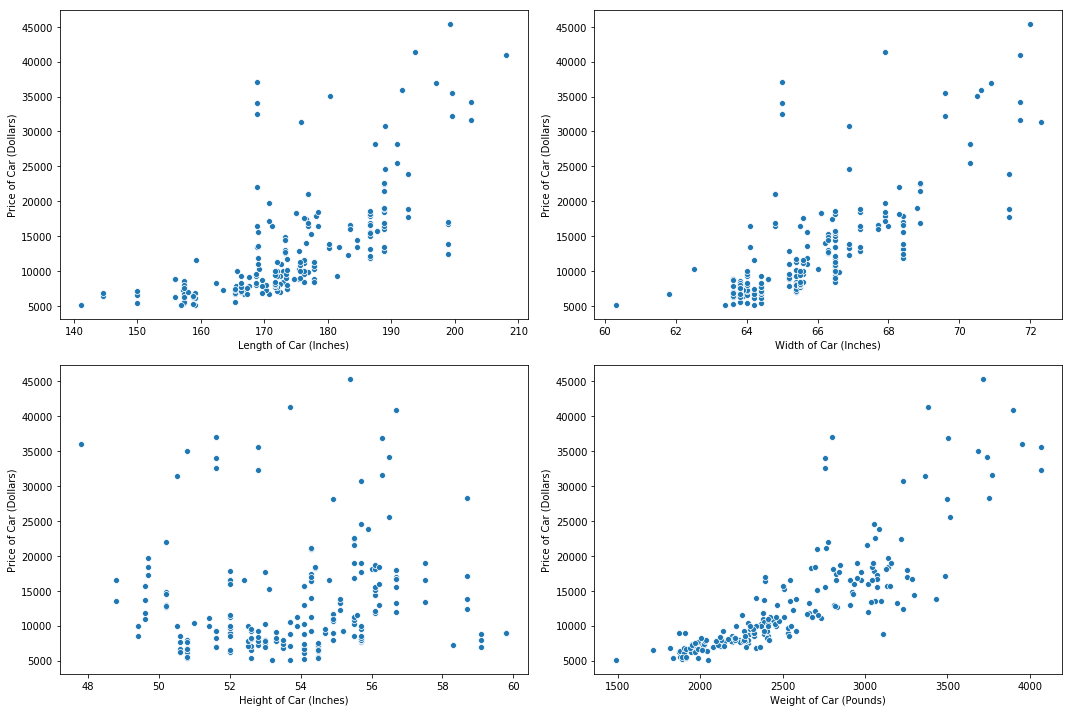

In [26]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = cardf, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')



plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = cardf, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')



plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = cardf, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')



plt4 = sns.scatterplot(x = 'curbweight', y = 'price', data = cardf, ax = axs[1,1])
plt4.set_xlabel('Weight of Car (Pounds)')
plt4.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

print("Length width and weight of the car is positively related with the price.")

## Data Attribute selection on basis of Dependency shown above

In [27]:
print("Dependent Variables finalized")

auto = cardf[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

Dependent Variables finalized


### Changing Categorical in Numerical using Dummy variables

In [29]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)


drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,1
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,1
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,...,1,0,0,1,0,1,0,0,0,1
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,...,0,0,1,0,0,0,1,0,0,1
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,...,0,0,0,0,0,0,1,0,0,1


### Droping useless attributes

In [30]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)
auto.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,0,0,0,0,1,0,0,1


### Split Data and Set role

In [2]:
x = auto.drop(['price'],axis=1)
y = auto['price']
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.35)

NameError: name 'auto' is not defined

## Linear Regression

In [33]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
print("Original Price : ", auto['price'])
print("Predicted Prices : ",lm.predict(X_test))

Original Price :  0      13495.000
1      16500.000
2      16500.000
3      13950.000
4      17450.000
5      15250.000
6      17710.000
7      18920.000
8      23875.000
9      17859.167
10     16430.000
11     16925.000
12     20970.000
13     21105.000
14     24565.000
15     30760.000
16     41315.000
17     36880.000
18      5151.000
19      6295.000
20      6575.000
21      5572.000
22      6377.000
23      7957.000
24      6229.000
25      6692.000
26      7609.000
27      8558.000
28      8921.000
29     12964.000
         ...    
175     9988.000
176    10898.000
177    11248.000
178    16558.000
179    15998.000
180    15690.000
181    15750.000
182     7775.000
183     7975.000
184     7995.000
185     8195.000
186     8495.000
187     9495.000
188     9995.000
189    13295.000
190    13845.000
191    12290.000
192    11595.000
193     9980.000
194    12940.000
195    13415.000
196    15985.000
197    16515.000
198    18420.000
199    18950.000
200    16845.000
201    19045.

In [34]:
tscore = lm.score(X_test,Y_test)
print("Score : ",tscore)

Score :  0.8728282858048182


In [35]:
taccuracy = tscore * 100
print("Accuracy : ",taccuracy)

Accuracy :  87.28282858048182


## Random Forest

In [36]:
regr = RandomForestRegressor(max_depth=7,random_state=10,n_estimators=100)
regr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [37]:
tscore = regr.score(X_test,Y_test)
print("Score : ",tscore)

Score :  0.9292148705994201


In [38]:
taccuracy = tscore * 100
print("Accuracy : ",taccuracy)

Accuracy :  92.92148705994201
